In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import precision_recall_fscore_support
ratings = pd.read_csv('/Users/utkarshsinha/Downloads/ratings.csv')  # Load ratings data
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)  # Create user-item matrix
svd = TruncatedSVD(n_components=50, random_state=42)  # Initialize SVD
user_factors = svd.fit_transform(user_movie_matrix)  # Compute user factors
movie_factors = svd.components_.T  # Compute movie factors
predicted_ratings = np.dot(user_factors, movie_factors.T)  # Predict ratings
y_true = (user_movie_matrix.values >= 4.5).astype(int).flatten()  # True labels 
y_pred = (predicted_ratings >= 4.5).astype(int).flatten()  # Predicted labels 
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')  # Evaluate precision, recall, F1
print(f'Collaborative Filtering - Precision: {precision}, Recall: {recall}, F1 Score: {f1}')  # Output results


Collaborative Filtering - Precision: 0.7663478430607066, Recall: 0.18040621266427717, F1 Score: 0.2920587688302027


In [13]:
from sklearn.metrics import precision_recall_fscore_support
tfidf = TfidfVectorizer(stop_words='english')  # Generate TF-IDF matrix based on genres
movies['genres'] = movies['genres'].fillna('')  # Fill missing genre data
tfidf_matrix = tfidf.fit_transform(movies['genres'])  # Create TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)  # Compute cosine similarity between movies
ratings = pd.read_csv('/Users/utkarshsinha/Downloads/ratings.csv')  # Load ratings data
high_ratings = ratings[ratings['rating'] >= 4.5]  # Assume movies rated above 4.5 are relevant
movies = pd.read_csv('/Users/utkarshsinha/Downloads/movies.csv')  # Load movies data
y_true_content = movies['movieId'].apply(lambda x: 1 if x in high_ratings['movieId'].values else 0)  # Mark relevant movies
# Predict relevance based on cosine similarity (top-10 similar movies)
y_pred_content = []
for i in range(len(movies)):
    sim_scores = list(enumerate(cosine_sim[i]))  # Get similarity scores for movie i
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort by similarity
    top_10_indices = [index for index, score in sim_scores[1:11]]  # Get top 10 similar movies
    predicted_relevance = any(y_true_content.iloc[index] == 1 for index in top_10_indices)  # Check if any are relevant
    y_pred_content.append(int(predicted_relevance))  # Append relevance prediction
precision_cbf, recall_cbf, f1_cbf, _ = precision_recall_fscore_support(y_true_content, y_pred_content, average='binary')  # Evaluate
print(f'Content-Based Filtering - Precision: {precision_cbf}, Recall: {recall_cbf}, F1 Score: {f1_cbf}')  # Print results


Content-Based Filtering - Precision: 0.4168122495118693, Recall: 1.0, F1 Score: 0.5883803583085515


In [14]:
import numpy as np
num_users, num_movies = user_movie_matrix.shape  # Get number of users and movies
combined_scores = np.zeros((num_users, num_movies))  # Initialize combined score matrix
for user_idx in range(num_users):
    for movie_idx in range(num_movies):
        cf_score = predicted_ratings[user_idx, movie_idx]  # Collaborative Filtering predicted score
        cb_score = cosine_sim[movie_idx].mean()  # Content-Based Filtering similarity score
        combined_scores[user_idx, movie_idx] = cf_score + cb_score  # Combine the two scores
y_pred_hybrid = (combined_scores.flatten() >= 4.5).astype(int)  # Threshold for hybrid predictions
precision_hybrid, recall_hybrid, f1_hybrid, _ = precision_recall_fscore_support(y_true, y_pred_hybrid, average='binary')  # Evaluate hybrid model
print(f'Hybrid Model - Precision: {precision_hybrid}, Recall: {recall_hybrid}, F1 Score: {f1_hybrid}')  # Output results

Hybrid Model - Precision: 0.7134713471347135, Recall: 0.21854608951383145, F1 Score: 0.3345996904460391


                     Model  Precision    Recall  F1-Score
0  Collaborative Filtering   0.766348  0.180406  0.292059
1  Content-Based Filtering   0.416812  1.000000  0.588380
2             Hybrid Model   0.713471  0.218546  0.334600


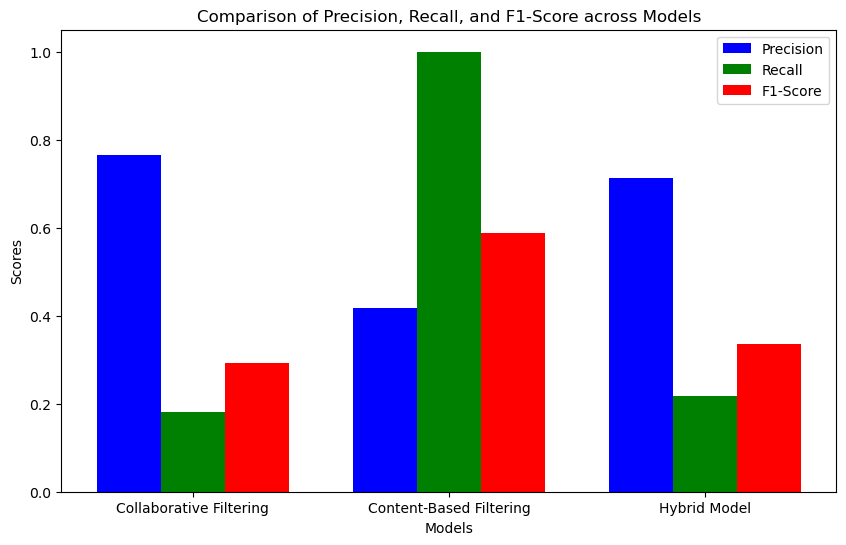

As we can see, Collaborative Filtering has the highest precision, indicating that its recommendations are the
most accurate but with a lower recall, meaning it misses many relevant recommendations.
Content-Based Filtering has perfect recall, capturing all relevant items, but sacrifices precision, leading
to more irrelevant recommendations.
Hybrid Model however, balances the two, offering a good mix of precision and recall, making it the most well-rounded
approach.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
comparison_table = pd.DataFrame({  # Create comparison table
    'Model': ['Collaborative Filtering', 'Content-Based Filtering', 'Hybrid Model'],
    'Precision': [precision, precision_cbf, precision_hybrid],
    'Recall': [recall, recall_cbf, recall_hybrid],
    'F1-Score': [f1, f1_cbf, f1_hybrid]
})
print(comparison_table)  # Display the table
labels = comparison_table['Model']  # Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 6))  # Set up the figure
bar_width = 0.25  # Width of the bars
r1 = range(len(labels))  # X locations for the groups
r2 = [x + bar_width for x in r1]  # Adjust positions for second set of bars
r3 = [x + bar_width for x in r2]  # Adjust positions for third set of bars
ax.bar(r1, comparison_table['Precision'], width=bar_width, label='Precision', color='blue')  # Plot Precision bars
ax.bar(r2, comparison_table['Recall'], width=bar_width, label='Recall', color='green')  # Plot Recall bars
ax.bar(r3, comparison_table['F1-Score'], width=bar_width, label='F1-Score', color='red')  # Plot F1-Score bars
ax.set_xlabel('Models')  # Add x-axis label
ax.set_ylabel('Scores')  # Add y-axis label
ax.set_title('Comparison of Precision, Recall, and F1-Score across Models')  # Add title
ax.set_xticks([r + bar_width for r in range(len(labels))])  # Set x-ticks
ax.set_xticklabels(labels)  # Set x-tick labels
ax.legend()  # Add legend
plt.show()  # Show the plot
print("As we can see, Collaborative Filtering has the highest precision, indicating that its recommendations are the\nmost accurate but with a lower recall, meaning it misses many relevant recommendations.")
print("Content-Based Filtering has perfect recall, capturing all relevant items, but sacrifices precision, leading\nto more irrelevant recommendations.")
print("Hybrid Model however, balances the two, offering a good mix of precision and recall, making it the most well-rounded\napproach.")
